In [1]:
import warnings
warnings.filterwarnings("ignore", category=RuntimeWarning)
from tqdm.auto import trange
import time
from qutip import *
import numpy as np
import matplotlib.pyplot as plt
import kwant
import math
from math import  sqrt
import scipy
from itertools import repeat
from numba import jit

import DEDlib

In [2]:
N=2000
poles=4
U=3
Sigma=3/2
Gamma=0.3
SizeO=1001
etaco=[0.02,1e-6]
ctype='snb'
Ed='AS'
bound=3
Tk=[0.000000000001]
posb=0
omega,eta,selectpcT,selectpT= np.linspace(-bound,bound,SizeO),etaco[0]*abs(np.linspace(-bound,bound,SizeO))+etaco[1],np.zeros((N,poles),dtype = 'float'),[]
c,pbar=[DEDlib.Jordan_wigner_transform(i, 2*poles) for i in range(2*poles)],trange(N,position=posb,leave=False,desc='Iterations',bar_format='{l_bar}{bar:10}{r_bar}{bar:-10b}')
n,AvgSigmadat,Nfin,nd=sum([c[i].dag()*c[i] for i in range(2*poles)]),np.zeros((len(Tk),SizeO),dtype = 'complex_'),np.zeros(len(Tk),dtype = 'float'),np.zeros(len(Tk),dtype = 'complex_')

for i in pbar:
    reset = False
    while not reset:
        select=sorted(DEDlib.Lorentzian(omega, Gamma, poles)[1])
        NewM,nonG=DEDlib.Startrans(poles,select,0,omega,eta)

        (MBGdat,Boltzmann,Ev0),reset=DEDlib.AIMsolver(NewM[0][0], [NewM[k+1][k+1] for k in range(len(NewM)-1)],NewM[0,1:], U,Sigma,omega,eta,c, n, ctype,Tk)



        if np.isnan(1/nonG-1/MBGdat+Sigma).any(): reset=False
        selectpT.append(select)
    selectpcT[i,:]=select
    Nfin+=Boltzmann
    AvgSigmadat+=(1/nonG-1/MBGdat+Sigma)
    nd+=np.conj(Ev0).T@(c[0].dag() * c[0] + c[1].dag() * c[1]).data.tocoo()@Ev0
pbar.close()

#np.real(nd/Nfin).squeeze(),(AvgSigmadat/Nfin[:,None]).squeeze(),(-np.imag(np.nan_to_num(1/(omega-AvgSigmadat/Nfin[:,None]+AvgSigmadat[int(np.round(SizeO/2))]/Nfin[:,None]+1j*Gamma)))/np.pi).squeeze(),Lorentzian(omega,Gamma,poles)[0],omega,selectpT,selectpcT



Iterations:   0%|          | 0/2000 [00:00<?, ?it/s]

In [19]:
ndf=np.real(nd/Nfin).squeeze()
AvgSig=(AvgSigmadat/Nfin[:,None]).squeeze()
fDOS=(-np.imag(np.nan_to_num(1/(omega-AvgSigmadat/Nfin[:,None]+1j*Gamma)))/np.pi).squeeze()
lor=DEDlib.Lorentzian(omega,Gamma,poles)[0]



In [13]:
AvgSigmadat/Nfin[:,None]

array([[0.83962389-0.21555359j, 0.8396951 -0.2169939j ,
        0.83990643-0.21829042j, ..., 2.15972629-0.24885805j,
        2.15607232-0.24725074j, 2.15235268-0.24616176j]])

In [16]:
(AvgSigmadat/Nfin[:,None])[0][500]

(2.270750852792897-0.000751610222124825j)

[[1999.06767509]]
(2.270750852792897-0.000751610222124825j)


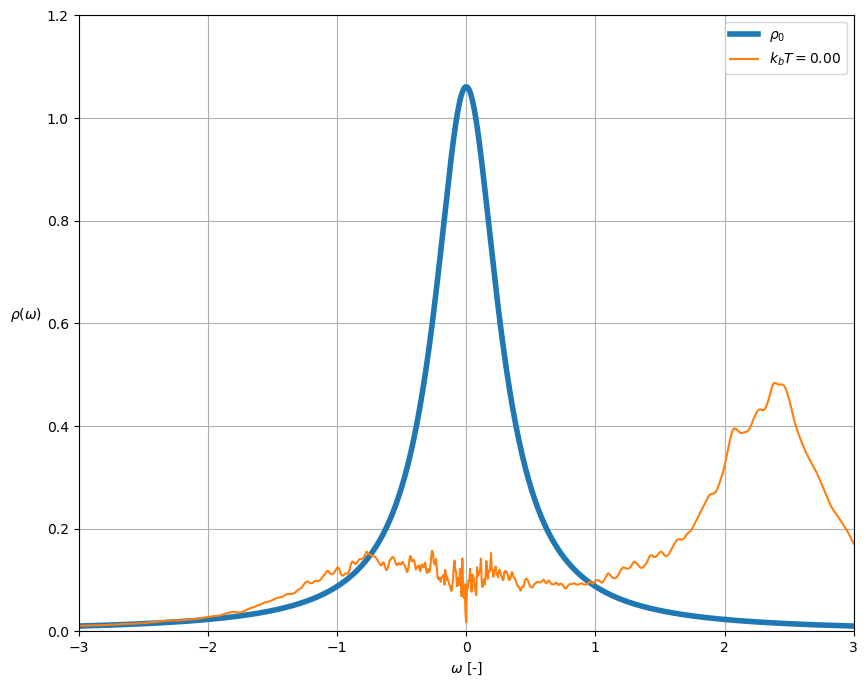

In [20]:
print(Nfin[:,None])
print(AvgSig[500])
plt.figure(figsize=(10,8))
plt.xlim(min(omega), max(omega))
plt.gca().set_ylim(bottom=0,top=1.2)
plt.xlabel("$\\omega$ [-]")
plt.gca().set_ylabel("$\\rho$($\\omega$)",va="bottom", rotation=0,labelpad=15)
plt.plot(omega,DEDlib.Lorentzian(omega,Gamma,poles)[0],linewidth=4,label='$\\rho_0$')
for i in range(len(Tk)):
    plt.plot(omega, fDOS,label='$k_bT= %.2f$'%Tk[i])
#plt.plot(omega, fDOS3,label='$\\rho$')
#plt.plot(omega, fDOS4,label='$\\rho$')
plt.legend()
plt.grid()